# Module 3.4 — Drawdown Duration
#### Background assumptions
- Outcome distributions are fixed
- No system parameters or rules are changed
- All paths are generated under identical conditions

Drawdowns are typically discussed in terms of depth.    
This module focuses instead on duration.    

#### Purpose of this simulation
To measure how long equity paths spend below prior peaks
and how recovery time varies across otherwise identical paths.

#### Common intuitive beliefs (to be examined)
- Shallow drawdowns are easy to endure
- Pain increases primarily with depth
- Time spent “going nowhere” reflects inefficiency

#### Objective

>To observe how drawdown duration, not just depth, shapes lived experience.

In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
n_trades = 300
wins = 165
losses = n_trades - wins

outcomes = np.array([1]*wins + [-1]*losses)

In [12]:
def drawdown_duration(equity):
    peak = np.maximum.accumulate(equity)
    underwater = equity < peak

    dd_len = []
    dd = 0
    for i in underwater:
        if i:
            dd += 1
        else:
            if dd > 0:
                dd_len.append(dd)
            dd = 0
    if dd > 0:
        dd_len.append(dd)

    
    return max(dd_len) if dd_len else 0



In [13]:
def max_drawdown(equity):
    peak = np.maximum.accumulate(equity)
    dd = peak - equity

    max_dd = max(dd)
    return max_dd
          

In [14]:
n_paths = 5000

durations = []
depths = []

for _ in range(n_paths):
    path = np.concatenate([[0], np.random.permutation(outcomes).cumsum()])
    durations.append(drawdown_duration(path))
    depths.append(max_drawdown(path))
    
durations = np.array(durations)
depths = np.array(depths)

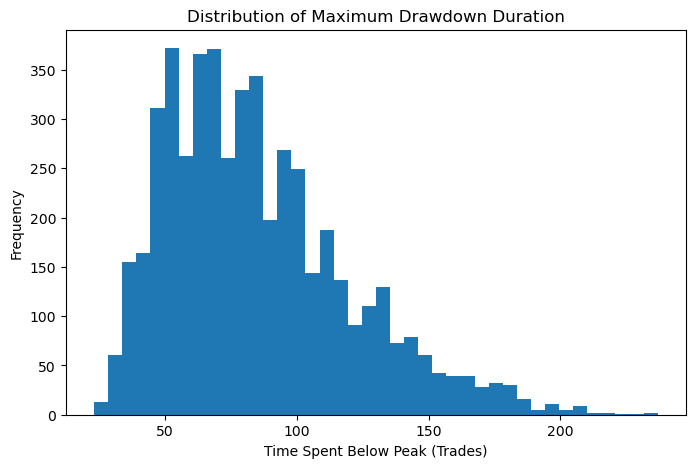

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(durations, bins=40)
plt.title("Distribution of Maximum Drawdown Duration")
plt.xlabel("Time Spent Below Peak (Trades)")
plt.ylabel("Frequency")
plt.show()


In [16]:
for p in [50, 75, 90, 95]:
    print(f"{p}th percentile duration: {np.percentile(durations, p):.0f} trades")


50th percentile duration: 79 trades
75th percentile duration: 105 trades
90th percentile duration: 135 trades
95th percentile duration: 153 trades


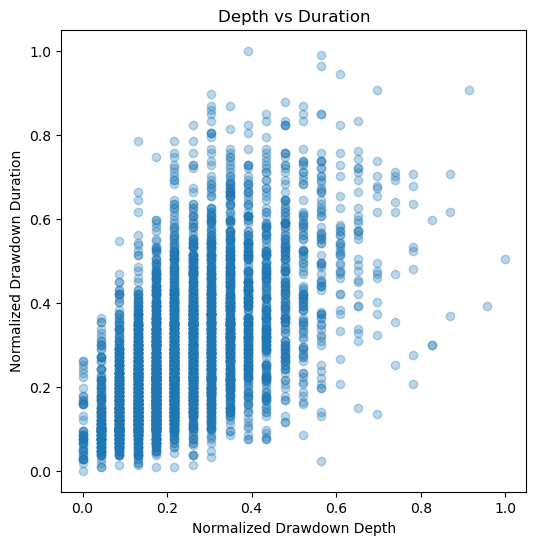

In [17]:
# Normalize for comparison
depth_norm = (depths - depths.min()) / (depths.max() - depths.min())
duration_norm = (durations - durations.min()) / (durations.max() - durations.min())

plt.figure(figsize=(6, 6))
plt.scatter(depth_norm, duration_norm, alpha=0.3)
plt.xlabel("Normalized Drawdown Depth")
plt.ylabel("Normalized Drawdown Duration")
plt.title("Depth vs Duration")
plt.show()


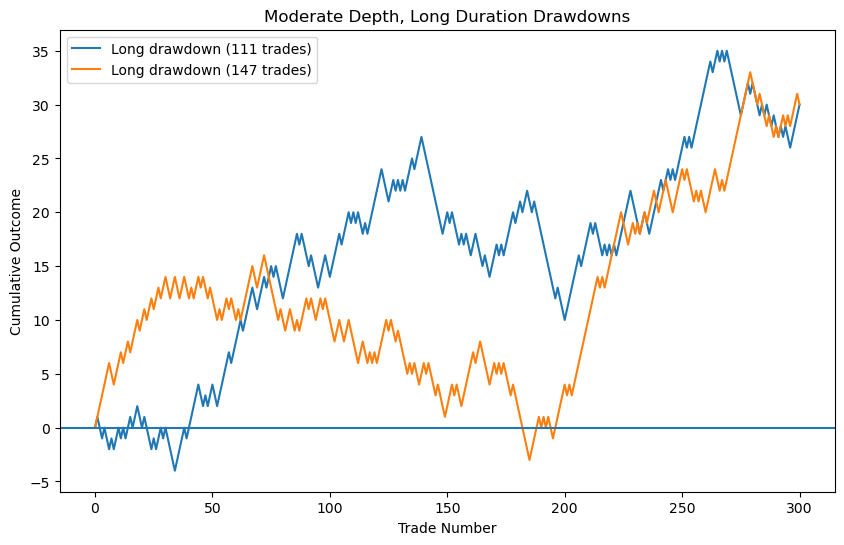

In [18]:
plt.figure(figsize=(10, 6))

shown = 0
while shown < 2:
    path = np.concatenate([[0],np.cumsum(np.random.permutation(outcomes))])
    if max_drawdown(path) > 15 and drawdown_duration(path) > 60:
        plt.plot(path, label=f"Long drawdown ({drawdown_duration(path)} trades)")
        shown += 1

plt.axhline(0)
plt.legend()
plt.title("Moderate Depth, Long Duration Drawdowns")
plt.xlabel("Trade Number")
plt.ylabel("Cumulative Outcome")
plt.show()


# Observations
- Drawdown duration varies widely across paths generated under identical conditions
- Long periods below prior equity peaks occur frequently, even without deep losses
- Drawdown depth and drawdown duration are weakly related
- Many paths experience extended flat or drifting periods before recovery

# Interpretation
- Shallow drawdowns are not necessarily easier to endure
- Long drawdowns create sustained uncertainty rather than acute pain
- The absence of progress is not informative about system quality

# Key Insight

> Humans tolerate pain better than uncertainty.

Depth triggers fear.
Duration triggers doubt.

# Behavioral Implication

Extended time under water naturally leads to:
- Boredom
- Second-guessing
- Increased temptation to interfere

These reactions do not imply poor discipline or flawed logic.
They are predictable responses to prolonged uncertainty.

# Reframe
- Time spent below peak is not a signal
- Flat or slow equity does not require explanation
- “Nothing happening” is a statistically normal regime

This module reframes drawdown duration as a structural cost of variance, not a failure of process or conviction.
